<a href="https://colab.research.google.com/github/2203A51251/NLP_Lab/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load data fromkeras.datasets and perform following computational analysis:- [CO3]**

(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb

In [30]:
max_features = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
def build_gru_model(input_shape, output_dim):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=64, input_length=input_shape))
    model.add(GRU(128, return_sequences=False))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model(input_shape=maxlen, output_dim=2)
gru_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
gru_history = gru_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 126s 315ms/step - accuracy: 0.6979 - loss: 0.5404 - val_accuracy: 0.8380 - val_loss: 0.3613
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 310ms/step - accuracy: 0.8909 - loss: 0.2690 - val_accuracy: 0.8356 - val_loss: 0.3737
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 118s 303ms/step - accuracy: 0.9283 - loss: 0.1876 - val_accuracy: 0.8504 - val_loss: 0.3717
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 314ms/step - accuracy: 0.9576 - loss: 0.1195 - val_accuracy: 0.8423 - val_loss: 0.4583
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 308ms/step - accuracy: 0.9745 - loss: 0.0775 - val_accuracy: 0.8367 - val_loss: 0.4940


**2. Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets. [CO3]**

In [33]:
def build_lstm_model(input_shape, output_dim):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=64, input_length=input_shape))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model(input_shape=maxlen, output_dim=2)
lstm_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the LSTM model
lstm_history = lstm_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f"GRU Model Accuracy: {gru_accuracy*100:.2f}%")

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy*100:.2f}%")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 304ms/step - accuracy: 0.7190 - loss: 0.5204 - val_accuracy: 0.8440 - val_loss: 0.3628
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 302ms/step - accuracy: 0.8953 - loss: 0.2629 - val_accuracy: 0.8475 - val_loss: 0.3496
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 301ms/step - accuracy: 0.9262 - loss: 0.1960 - val_accuracy: 0.8376 - val_loss: 0.3830
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 296ms/step - accuracy: 0.9516 - loss: 0.1345 - val_accuracy: 0.8336 - val_loss: 0.4572
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 304ms/step - accuracy: 0.9651 - loss: 0.0951 - val_accuracy: 0.8307 - val_loss: 0.5892
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8348 - loss: 0.5056
GRU Model Accuracy: 83.67%
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8291 - loss: 0.6044
LSTM Model Accuracy: 83.07%


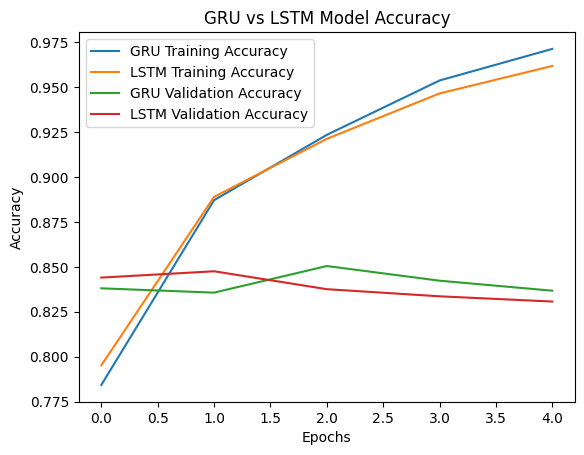

In [35]:
# Plot accuracy comparison
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('GRU vs LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()